# Parts of Speech Tag

## Introduction

POS tagging is based on the definition and context of words in the text, and marks them with specific parts of speech. For example, they can be identified as nouns, verbs, adjectives, adverbs, and usually include other grammatical categories, such as tense, numbers (plural/singular), case, etc.

## Purpose

POS tags can mark the part of speech of each word. In addition to counting words, additional language processing standards are introduced. POS tags can also be used to distinguish multiple parts of speech for the same word. POS tags are also used to process grammatical or lexical patterns rather than specific words.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import gensim
import nltk
from gensim.models import Word2Vec
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('conll2000')
nltk.download('tagsets')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\conll2000.zip.
[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping help\tagsets.zip.


True

In [2]:
#Tagging Words
#You can use the following functions to find the meaning of various tags
nltk.help.upenn_tagset('VB')
nltk.help.upenn_tagset('NNS')

VB: verb, base form
    ask assemble assess assign assume atone attention avoid bake balkanize
    bank begin behold believe bend benefit bevel beware bless boil bomb
    boost brace break bring broil brush build ...
NNS: noun, common, plural
    undergraduates scotches bric-a-brac products bodyguards facets coasts
    divestitures storehouses designs clubs fragrances averages
    subjectivists apprehensions muses factory-jobs ...


In [3]:
#Label a piece of text in the corpus
from nltk.corpus import conll2000
x = (conll2000.tagged_sents())
for i in range(5):
     print (x[i])

[('Confidence', 'NN'), ('in', 'IN'), ('the', 'DT'), ('pound', 'NN'), ('is', 'VBZ'), ('widely', 'RB'), ('expected', 'VBN'), ('to', 'TO'), ('take', 'VB'), ('another', 'DT'), ('sharp', 'JJ'), ('dive', 'NN'), ('if', 'IN'), ('trade', 'NN'), ('figures', 'NNS'), ('for', 'IN'), ('September', 'NNP'), (',', ','), ('due', 'JJ'), ('for', 'IN'), ('release', 'NN'), ('tomorrow', 'NN'), (',', ','), ('fail', 'VB'), ('to', 'TO'), ('show', 'VB'), ('a', 'DT'), ('substantial', 'JJ'), ('improvement', 'NN'), ('from', 'IN'), ('July', 'NNP'), ('and', 'CC'), ('August', 'NNP'), ("'s", 'POS'), ('near-record', 'JJ'), ('deficits', 'NNS'), ('.', '.')]
[('Chancellor', 'NNP'), ('of', 'IN'), ('the', 'DT'), ('Exchequer', 'NNP'), ('Nigel', 'NNP'), ('Lawson', 'NNP'), ("'s", 'POS'), ('restated', 'VBN'), ('commitment', 'NN'), ('to', 'TO'), ('a', 'DT'), ('firm', 'NN'), ('monetary', 'JJ'), ('policy', 'NN'), ('has', 'VBZ'), ('helped', 'VBN'), ('to', 'TO'), ('prevent', 'VB'), ('a', 'DT'), ('freefall', 'NN'), ('in', 'IN'), ('ste

In [4]:
#Break up a sentence
sentence = "A busy and tired student is sitting in the computer-room"
tokenized_words = word_tokenize(sentence)
tokenized_words

['A',
 'busy',
 'and',
 'tired',
 'student',
 'is',
 'sitting',
 'in',
 'the',
 'computer-room']

In [5]:
#Label the sentence
for words in tokenized_words:
    tagged_word = nltk.pos_tag(tokenized_words)
tagged_word

[('A', 'DT'),
 ('busy', 'JJ'),
 ('and', 'CC'),
 ('tired', 'JJ'),
 ('student', 'NN'),
 ('is', 'VBZ'),
 ('sitting', 'VBG'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('computer-room', 'NN')]

# Chunking and Chinking

## Introduction

Chunking refers to the process of dividing a single piece of information and grouping it into larger units. In text processing, individual broken words can be assembled into specific paragraphs.Chinking is very similar to chunking. It is basically a method of deleting chunks from chunks. The block you remove from the block is your fissure.

## Purpose

Because POS tags can only be used to identify the part of speech of each word in a sentence, we can use chunking to obtain the required phrase or meaning group separately. Chunking can exclude unnecessary modifiers and extract the required part from the lengthy description.

In [6]:
#Break a sentence into meaningful phrases through chunking, phrases rather than just single words.

#Create a grammar to segregate NP
grammar = "NP : {<JJ>*<CC>?<JJ>*<NN>}"

parser = nltk.RegexpParser(grammar)

output = parser.parse(tagged_word)
print(output)

#Visualization results
output.draw()

(S
  A/DT
  (NP busy/JJ and/CC tired/JJ student/NN)
  is/VBZ
  sitting/VBG
  in/IN
  the/DT
  (NP computer-room/NN))


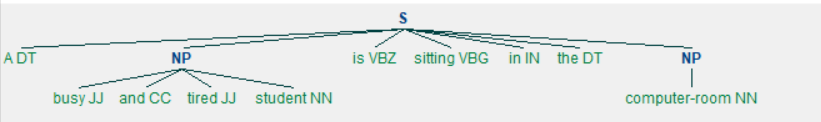

In [7]:
#Chinking

#Create a grammar to segregate adjectives
grammar = r"""NP:{<.*>+}
              }<JJ>?<CC><JJ>+{"""

parser = nltk.RegexpParser(grammar)

output = parser.parse(tagged_word)
print(output)

#Visualization results
output.draw()

(S
  (NP A/DT)
  busy/JJ
  and/CC
  tired/JJ
  (NP student/NN is/VBZ sitting/VBG in/IN the/DT computer-room/NN))


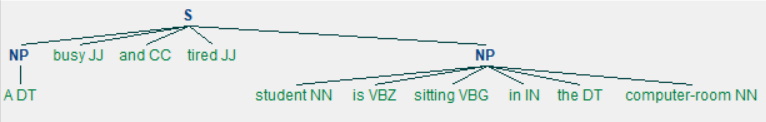

# Named Entity Recognition

## Introduction

The named entity recognition (NER) is one of the most popular data preprocessing task. It involves the identification of key information in the text and classification into a set of predefined categories. An entity is basically the thing that is consistently talked about or refer to in the text. NER is the form of NLP.

## Purpose

The main goal is to extract relevant information from text data. It automatically classifies named entities according to predefined categories (such as person, place, date, etc.)


In [8]:
#Named Entity Recognition (NER)
#It can automatically identify some elements in the sentence. Countries, people, organizations, etc.

nltk.download('maxent_ne_chunker')
nltk.download('words')
sentence2 = "Eliasson who comes form Sweden in  was elected President of the U.N."

#Break the scentence
tokenized_words2 = word_tokenize(sentence2)
tokenized_words2

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping chunkers\maxent_ne_chunker.zip.
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


['Eliasson',
 'who',
 'comes',
 'form',
 'Sweden',
 'in',
 'was',
 'elected',
 'President',
 'of',
 'the',
 'U.N',
 '.']

In [9]:
for w in tokenized_words2:
    tagged_words2 = nltk.pos_tag(tokenized_words2)

In [10]:
NER = nltk.ne_chunk(tagged_words2,binary=False)

print(NER)

NER.draw()

(S
  (PERSON Eliasson/NNP)
  who/WP
  comes/VBZ
  form/VBP
  (GPE Sweden/NNP)
  in/IN
  was/VBD
  elected/VBN
  President/NNP
  of/IN
  the/DT
  (ORGANIZATION U.N/NNP)
  ./.)


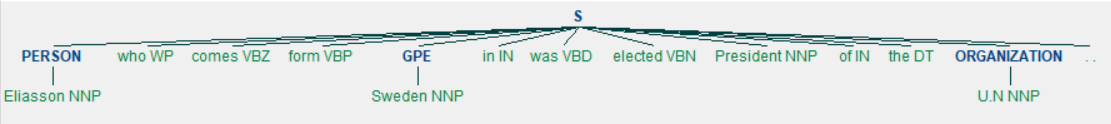